# Hoja de trabajo 1
Diego Morales Aquino
Pablo Zamora

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ydata_profiling import ProfileReport
from scipy.stats import normaltest

C:\Users\diego\AppData\Local\Temp\ipykernel_7200\103737648.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('movies.csv')

# 3.1. Calcular tabla de frecuencia de variables cualitativas

In [101]:
# Calcular la frecuencia
variable = "actorsCharacter"
frecuency = data[variable].value_counts()

topValues = frecuency.head(10) # top 5

# Reemplazar columna por "otros" para valores fuera del top5
data['topValues'] = data[variable].apply(lambda x: x if x in topValues.index else 'otros')

# Calcular frecuencia para nuevos valores
tabla_frecuencia = data['topValues'].value_counts().reset_index()

tabla_frecuencia.columns = [variable, 'Frecuencia']

#Enviar fila de "otros" al final
otros_row = tabla_frecuencia[tabla_frecuencia[variable] == 'otros']
tabla_frecuencia = tabla_frecuencia[tabla_frecuencia[variable] != 'otros']
tabla_frecuencia = pd.concat([tabla_frecuencia, otros_row])

print(f"     Tabla de frecuencia de variable {variable}")
tabla_frecuencia

     Tabla de frecuencia de variable actorsCharacter


,actorsCharacter,Frecuencia
1,||||,17
2,|||||,16
3,||||||,16
4,|||,14
5,|,13
6,Self,11
7,|||||||,9
8,Narrator,6
9,Himself,6
10,||,6


# 3.2. Verificar si variables cuantitativas siguen una dist. normal

In [102]:
quantitative_variables = [
 'budget',
 'revenue',
 'runtime',
 'actorsPopularity',
 'popularity',
 'voteAvg',
 'voteCount',
 'genresAmount',
 'productionCoAmount',
 'productionCountriesAmount',
 'actorsAmount',
 'castWomenAmount',
 'castMenAmount',
 ]
data[quantitative_variables] = data[quantitative_variables].apply(pd.to_numeric, errors='coerce')


for variable in quantitative_variables:

  stat, p_value = normaltest(data[variable], nan_policy="omit")

  if p_value < 0.05:
    print(f"{variable}: NO sigue una dist. normal. Valor-p = {p_value}.")
  else:
    print(f"{variable}: sigue una dist. normal. Valor-p = {p_value}.")



budget: NO sigue una dist. normal. Valor-p = 0.0.
revenue: NO sigue una dist. normal. Valor-p = 0.0.
runtime: NO sigue una dist. normal. Valor-p = 0.0.
actorsPopularity: NO sigue una dist. normal. Valor-p = 1.072520375231809e-13.
popularity: NO sigue una dist. normal. Valor-p = 0.0.
voteAvg: NO sigue una dist. normal. Valor-p = 9.267910291739193e-177.
voteCount: NO sigue una dist. normal. Valor-p = 0.0.
genresAmount: NO sigue una dist. normal. Valor-p = 9.688564083855264e-251.
productionCoAmount: NO sigue una dist. normal. Valor-p = 0.0.
productionCountriesAmount: NO sigue una dist. normal. Valor-p = 0.0.
actorsAmount: NO sigue una dist. normal. Valor-p = 0.0.
castWomenAmount: NO sigue una dist. normal. Valor-p = 0.0.
castMenAmount: NO sigue una dist. normal. Valor-p = 0.0.


# 4.1 ¿Cuáles son las 10 películas que contaron con más presupuesto?

In [12]:

data["budget"] = pd.to_numeric(data["budget"], errors='coerce') # convertir datos de budget a num

data.sort_values(by="budget", ascending=False).head(10)[["title", "budget"]]


,title,budget
716,Pirates of the Caribbean: On Stranger Tides,380000000.0
4711,Avengers: Age of Ultron,365000000.0
5953,Avengers: Endgame,356000000.0
4954,Justice League,300000000.0
5954,Avengers: Infinity War,300000000.0
163,Pirates of the Caribbean: At World's End,300000000.0
607,Superman Returns,270000000.0
7135,The Lion King,260000000.0
3792,Tangled,260000000.0
280,Spider-Man 3,258000000.0


# 4.2 ¿Cuáles son las 10 películas que más ingresos tuvieron?

In [104]:

print(data["revenue"].dtypes)
data.sort_values(by="revenue", ascending=False).head(10)[["title", "revenue"]]

int64


,title,revenue
3211,Avatar,2847246203
5953,Avengers: Endgame,2797800564
307,Titanic,2187463944
4948,Star Wars: The Force Awakens,2068223624
5954,Avengers: Infinity War,2046239637
4915,Jurassic World,1671713208
7135,The Lion King,1667635327
9050,Spider-Man: No Way Home,1631853496
3398,The Avengers,1518815515
5088,Furious 7,1515047671


# 4.3 (3 puntos) ¿Cuál es la película que más votos tuvo?

In [13]:

resultado = data.sort_values(by='voteCount', ascending=False).head(1)
resultado[['title', 'voteCount']]

,title,voteCount
3512,Inception,30788.0


# 4.4 ¿Cuál es la peor película de acuerdo a los votos de todos los usuarios?

In [105]:
print(data["voteAvg"].dtypes)
data.sort_values(by="voteAvg", ascending=True).head(1)[["title", "voteAvg"]]

float64


,title,voteAvg
9787,DAKAICHI -I'm Being Harassed by the Sexiest Man of the Year- The Movie: In Spain,1.3


# 4.5 ¿Cuántas películas se hicieron en cada año? ¿En qué año se hicieron más películas?

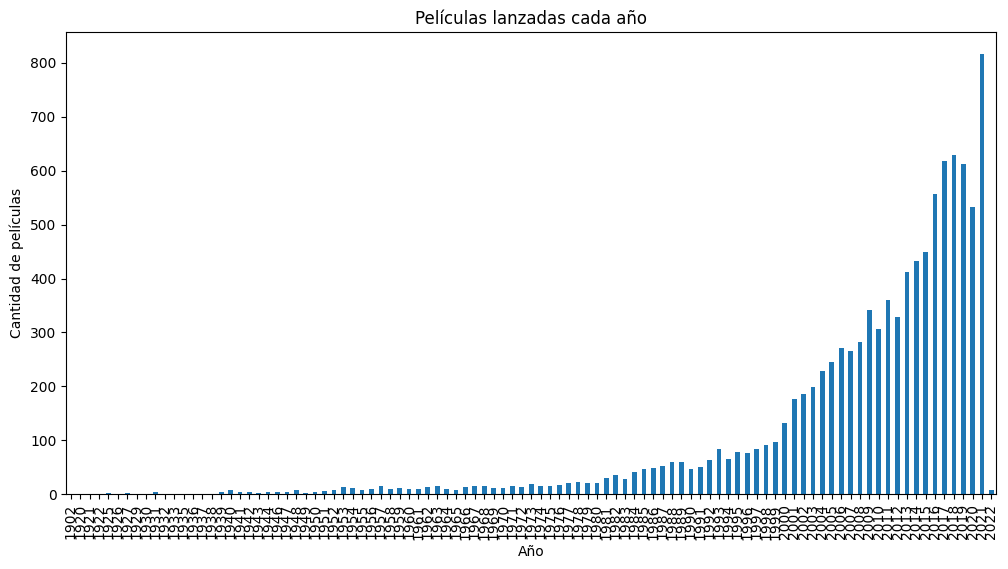

In [14]:

datos_fechas = data.copy()

datos_fechas['releaseDate'] = pd.to_datetime(datos_fechas['releaseDate'], errors='coerce')
datos_fechas = datos_fechas.dropna(subset=['releaseDate'])
datos_fechas['year'] = datos_fechas['releaseDate'].dt.year

movie_counts = datos_fechas['year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
movie_counts.plot(kind='bar')
plt.title('Películas lanzadas cada año')
plt.xlabel('Año')
plt.ylabel('Cantidad de películas')
plt.show()

# 4.6 ¿Cuál es el género principal de las 20 películas más recientes? ¿Cuál es el género principal que predomina en el conjunto de datos? Represéntelo usando un gráfico

In [106]:
print(data["releaseDate"].dtypes)
data["releaseDate"] = pd.to_datetime(data["releaseDate"], errors="coerce") #Convertir a tipo date

# Split de generos
data["genres"] = data["genres"].str.split("|")

object


datetime64[ns]


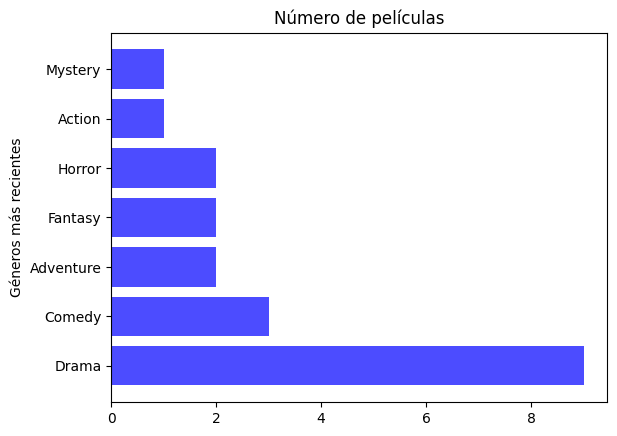

In [107]:
# 20 películas más recientes
print(data["releaseDate"].dtypes)
data["releaseDate"] = pd.to_datetime(data["releaseDate"], errors="coerce") #Convertir a tipo date


freq_genres = data.sort_values(by="releaseDate", ascending=True).head(20)["genres"].apply(lambda x: x[0] if x else None).value_counts().reset_index()

fig, ax = plt.subplots()
ax.barh(freq_genres["genres"], freq_genres["count"], color="blue", alpha=0.7)

ax.set_ylabel('Géneros más recientes')
ax.set_title('Número de películas')
plt.show()

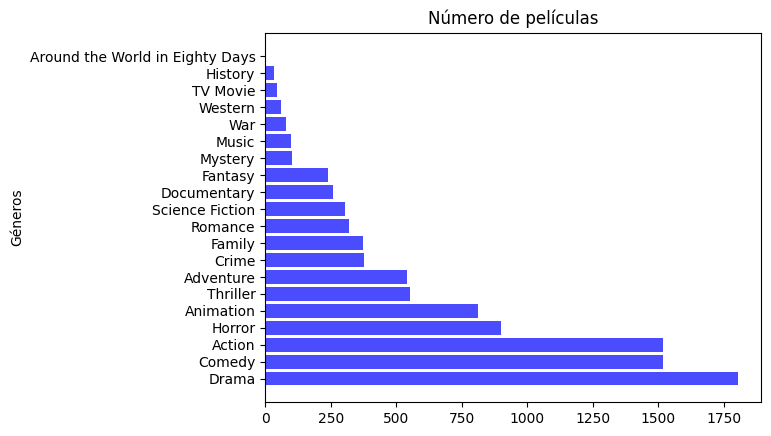

In [109]:
# 4.6 ¿Cuál es el género principal que predomina en el conjunto de datos? Represéntelo usando un gráfico


freq_genres = data["genres"].apply(lambda x: x[0] if isinstance(x, list) else None).value_counts().reset_index()

# generar gráfico 2
fig, ax = plt.subplots()

ax.barh(freq_genres["genres"], freq_genres["count"], color="blue", alpha=0.7)

ax.set_ylabel('Géneros')
ax.set_title('Número de películas')
plt.show()

# 4.7 ¿Las películas de qué género principal obtuvieron mayores ganancias?

In [15]:


# Extraer género principal
data['main_genre'] = data['genres'].apply(lambda x: x.split('|')[0] if pd.notna(x) else x)

# Convertir 'revenue' y 'budget' a números, tratando los valores no numéricos como NaN
data['revenue'] = pd.to_numeric(data['revenue'], errors='coerce')
data['budget'] = pd.to_numeric(data['budget'], errors='coerce')

# Calcular ganancias
data['profit'] = data['revenue'] - data['budget']

# Agrupar por género principal y sumar ganancias
genre_profits = data.groupby('main_genre')['profit'].sum()
genre_profits_sorted = genre_profits.sort_values(ascending=False)
profitsTable = genre_profits_sorted.to_frame(name='Total Ganancias')
profitsTable

,Total Ganancias
main_genre,
Action,9.227618e+10
Adventure,5.989008e+10
Comedy,4.972815e+10
Drama,4.434434e+10
Animation,3.225811e+10
Family,1.857533e+10
Horror,1.743897e+10
Science Fiction,1.638454e+10
Fantasy,1.459136e+10


# 4.8 ¿La cantidad de actores influye en los ingresos de las películas?¿se han hecho películas con más actores en los últimos años?

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

x = data["actorsAmount"].values.reshape(-1, 1)
y = data["revenue"].values.reshape(-1, 1)


#Limpiar los datos NAN con la media
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(x[:, :])
x[:, :] = imputer.transform(x[:, :])

imputer.fit(y[:, :])
y[:, :] = imputer.transform(y[:, :])



In [111]:
# Entrenar el modelo de regresion simple
regresor = LinearRegression()
regresor.fit(x, y)

LinearRegression()

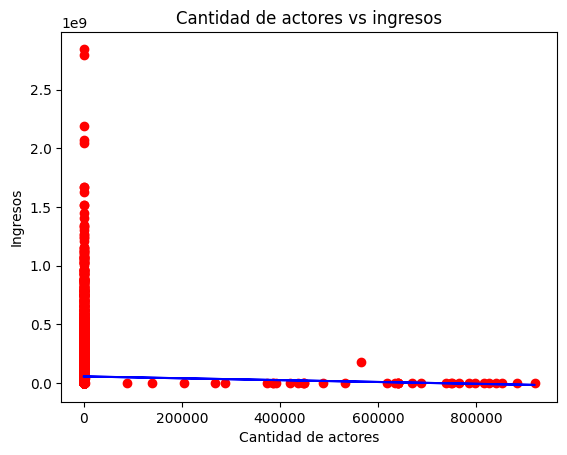

In [112]:
# Realizar gráfico
plt.scatter(x, y, color = 'red')
plt.plot(x, regresor.predict(x), color = 'blue')
plt.title('Cantidad de actores vs ingresos')
plt.xlabel('Cantidad de actores')
plt.ylabel('Ingresos')
plt.show()

In [113]:
# Calcular r2 del modelo
regresor.score(x, y)

0.0003824069381275219

### Actores por año

In [114]:
# Calcular promedio de actores por año
data["releaseDate"] = pd.to_datetime(data["releaseDate"], errors="coerce") #Convertir a tipo date
result = data.groupby(data['releaseDate'].dt.year).agg({'actorsAmount': 'mean'}).reset_index()
result

,releaseDate,actorsAmount
0,1902.0,11.000000
1,1920.0,11.000000
2,1921.0,35.000000
3,1922.0,20.000000
4,1925.0,31.500000
...,...,...
94,2018.0,3896.748808
95,2019.0,2107.874183
96,2020.0,2832.315197
97,2021.0,3188.525735


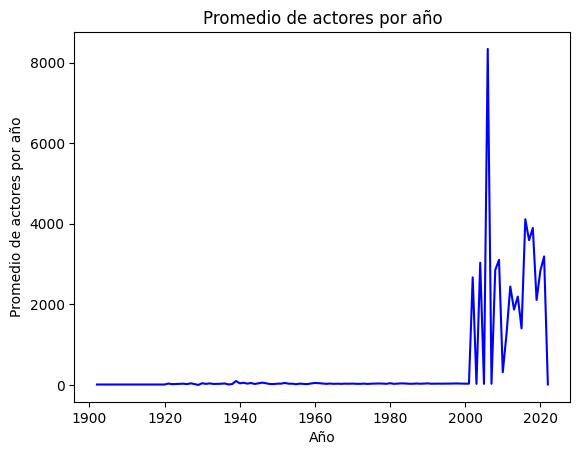

In [115]:
plt.plot(result["releaseDate"], result["actorsAmount"],  color='b')

plt.xlabel('Año')
plt.ylabel('Promedio de actores por año')
plt.title('Promedio de actores por año')
plt.show()

# 4.9 ¿Es posible que la cantidad de hombres y mujeres en el reparto influya en la popularidad y los ingresos de las películas?

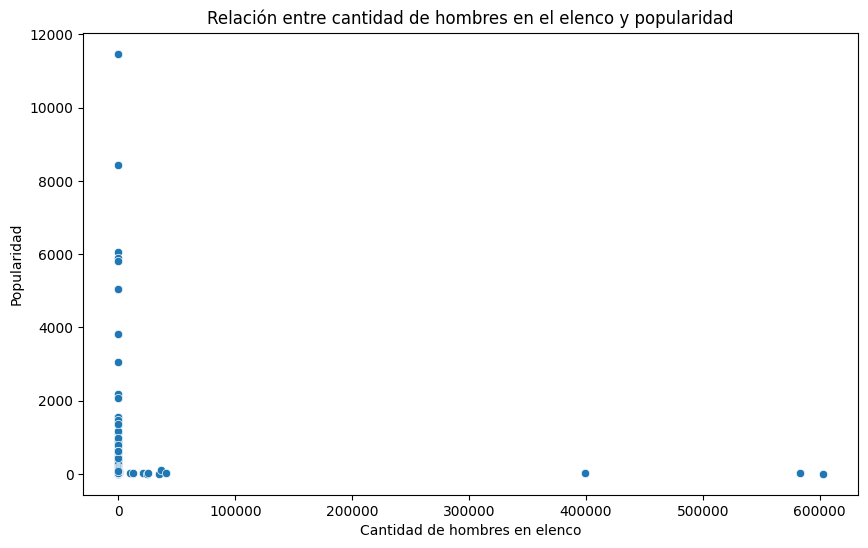

Coeficiente de correlación entre cantidad de hombres en el elenco y popularidad: -0.0033597333744416168


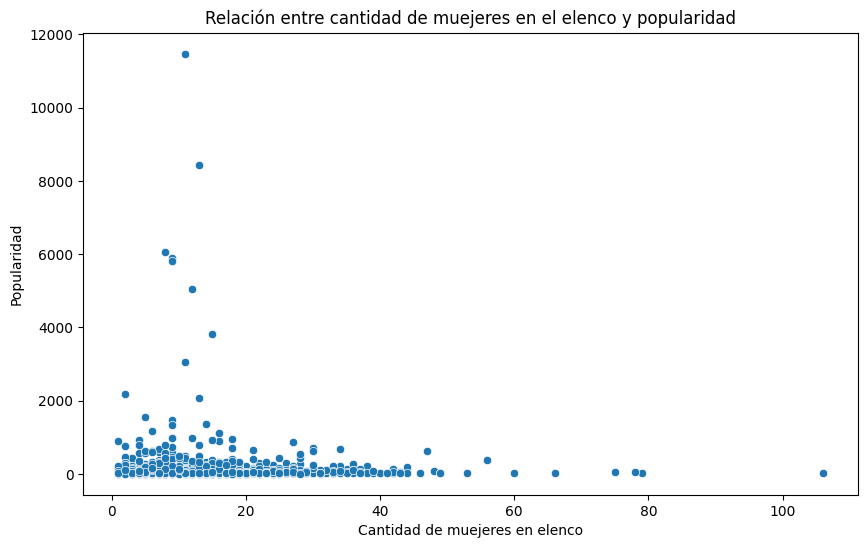

Coeficiente de correlación entre cantidad de mujeres en el elenco y popularidad: 0.04468602265200094


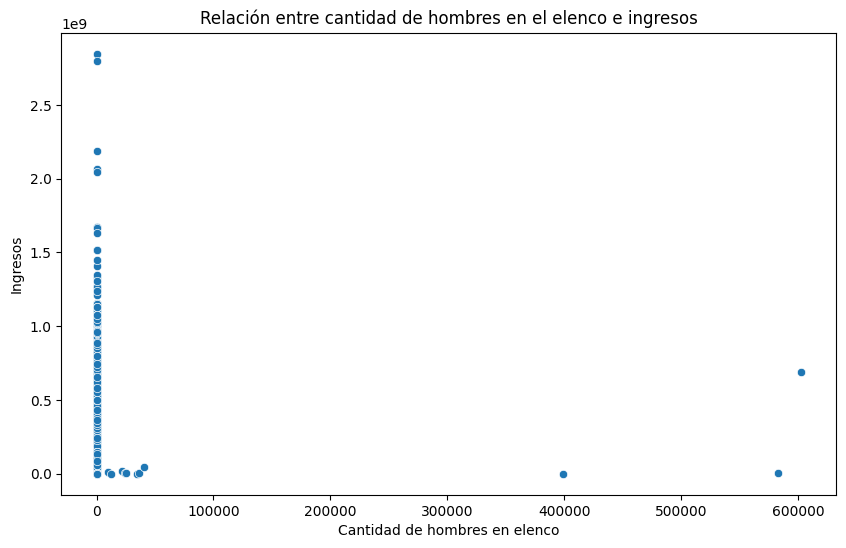

Coeficiente de correlación entre cantidad de hombres en el elenco e ingresos: 0.01761440092158928


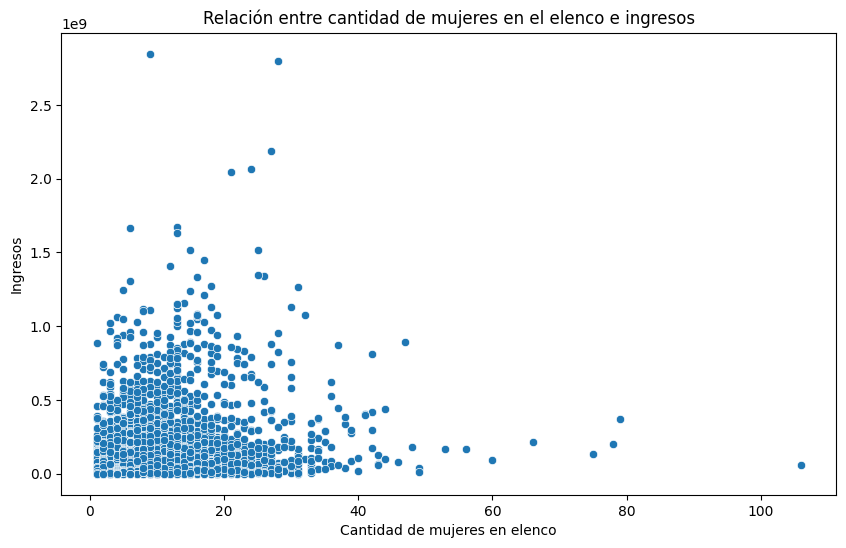

Coeficiente de correlación entre cantidad de mujeres en el elenco e ingresos: 0.2396774660552457


In [17]:
# 4.9 ¿Es posible que la cantidad de hombres y mujeres en el reparto influya en la popularidad y los ingresos de las películas?
import seaborn as sns

# Asegurarse de que los datos de popularidad, elenco e ingresos están en formato numérico
data['popularity'] = pd.to_numeric(data['popularity'], errors='coerce')
data['revenue'] = pd.to_numeric(data['revenue'], errors='coerce')
data['castWomenAmount'] = pd.to_numeric(data['castWomenAmount'], errors='coerce')
data['castMenAmount'] = pd.to_numeric(data['castMenAmount'], errors='coerce')

# Filtrar datos no númericos
datos_filtrados = data[(data['castMenAmount'] > 0) & (data['popularity'] > 0) & (data['castWomenAmount'] > 0) & (data['revenue'] > 0)]

# Diagrama de dispersión elenco masculino y popularidad
plt.figure(figsize=(10, 6))
sns.scatterplot(x='castMenAmount', y='popularity', data=datos_filtrados)
plt.title('Relación entre cantidad de hombres en el elenco y popularidad')
plt.xlabel('Cantidad de hombres en elenco')
plt.ylabel('Popularidad')
plt.show()
correlacion1 = datos_filtrados['castMenAmount'].corr(datos_filtrados['popularity'])
print(f'Coeficiente de correlación entre cantidad de hombres en el elenco y popularidad: {correlacion1}')

# Diagrama de dispersión elenco femenino y popularidad
plt.figure(figsize=(10, 6))
sns.scatterplot(x='castWomenAmount', y='popularity', data=datos_filtrados)
plt.title('Relación entre cantidad de muejeres en el elenco y popularidad')
plt.xlabel('Cantidad de muejeres en elenco')
plt.ylabel('Popularidad')
plt.show()
correlacion2 = datos_filtrados['castWomenAmount'].corr(datos_filtrados['popularity'])
print(f'Coeficiente de correlación entre cantidad de mujeres en el elenco y popularidad: {correlacion2}')

# Diagrama de dispersión elenco masculino e ingresos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='castMenAmount', y='revenue', data=datos_filtrados)
plt.title('Relación entre cantidad de hombres en el elenco e ingresos')
plt.xlabel('Cantidad de hombres en elenco')
plt.ylabel('Ingresos')
plt.show()
correlacion = datos_filtrados['castMenAmount'].corr(datos_filtrados['revenue'])
print(f'Coeficiente de correlación entre cantidad de hombres en el elenco e ingresos: {correlacion}')

# Diagrama de dispersión elenco femenino e ingresos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='castWomenAmount', y='revenue', data=datos_filtrados)
plt.title('Relación entre cantidad de mujeres en el elenco e ingresos')
plt.xlabel('Cantidad de mujeres en elenco')
plt.ylabel('Ingresos')
plt.show()
correlacion = datos_filtrados['castWomenAmount'].corr(datos_filtrados['revenue'])
print(f'Coeficiente de correlación entre cantidad de mujeres en el elenco e ingresos: {correlacion}')

# 4.10 ¿Quiénes son los directores que hicieron las 20 películas mejor calificadas?

In [116]:
data.sort_values(by="voteAvg", ascending=False)[["title", "director", "voteAvg"]].head(20)

,title,director,voteAvg
9348,How Ponyo was Born ~Hayao Miyazaki's Thought Process~,Kaku Arakawa,10.0
9247,Steven Universe: The Movie: Behind the Curtain,Rebecca Sugar,10.0
9991,Los Vengadores Chiflados,Miguel Angel Zavala,10.0
9734,Christmas at the Ranch,Christin Baker,10.0
9876,El Chavo Del Ocho: Lo Mejor De Don Ramon,NaN,10.0
8633,Hot Naked Sex & the City,Thomas Coven,10.0
9299,Spirit of Vengeance: The Making of 'Ghost Rider',Laurent Bouzereau,10.0
9085,Holidays,Víctor Barba|Juan Olivares,10.0
6751,Dragon Ball Kami BEST [Bonus DVD],NaN,9.8
6886,The Spectacular Spider-Man Attack of the Lizard,Dave Bullock|Troy Adomitis|Victor Cook,9.6


# 4.11 ¿Cómo se correlacionan los presupuestos con los ingresos?

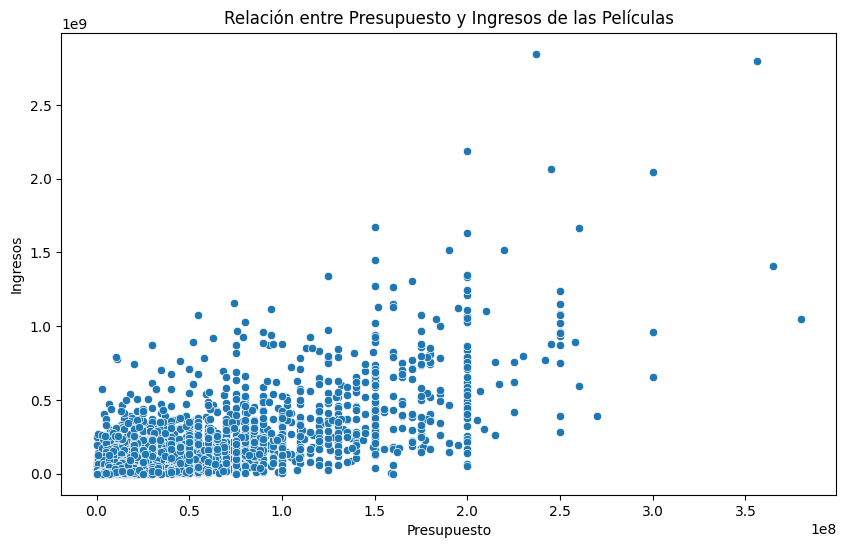

Coeficiente de correlación entre presupuesto e ingresos: 0.7186532245805859


In [18]:
# 4.11 ¿Cómo se correlacionan los presupuestos con los ingresos?
import seaborn as sns

# Asegurarse de que los datos de presupuesto e ingresos están en formato numérico
data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
data['revenue'] = pd.to_numeric(data['revenue'], errors='coerce')

# Eliminar filas donde el presupuesto o los ingresos sean nulos o cero
datos_filtrados = data[(data['budget'] > 0) & (data['revenue'] > 0)]

# Diagrama de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=datos_filtrados)
plt.title('Relación entre Presupuesto y Ingresos de las Películas')
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.show()


# Calcular y mostrar el coeficiente de correlación
correlacion = datos_filtrados['budget'].corr(datos_filtrados['revenue'])
print(f'Coeficiente de correlación entre presupuesto e ingresos: {correlacion}')

# 4.12 ¿Se asocian ciertos meses de lanzamiento con mejores ingresos?

In [117]:
#Limpiar datos de ingresos
data["revenue"].replace(0, data["revenue"].mean(), inplace=True)

C:\Users\diego\AppData\Local\Temp\ipykernel_9284\1244321864.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["revenue"].replace(0, data["revenue"].mean(), inplace=True)


In [118]:
data["releaseDate"] = pd.to_datetime(data["releaseDate"], errors="coerce") #Convertir a tipo date
data['releaseMonth'] = data['releaseDate'].dt.month # separar mes

In [119]:

# Conteo de peliculas en el top de ingresos por mes
top_movies = data.sort_values(by="revenue", ascending=False).head(100).reset_index()

# agrupar por mes y contar
result = top_movies.groupby('releaseMonth').size().reset_index()

result.columns = ["releaseMonth", "frequency"]
result.sort_values(by="frequency", ascending=False)


,releaseMonth,frequency
4,6.0,22
3,5.0,17
9,12.0,13
5,7.0,11
2,4.0,10
8,11.0,10
7,10.0,8
1,3.0,4
0,2.0,3
6,9.0,2


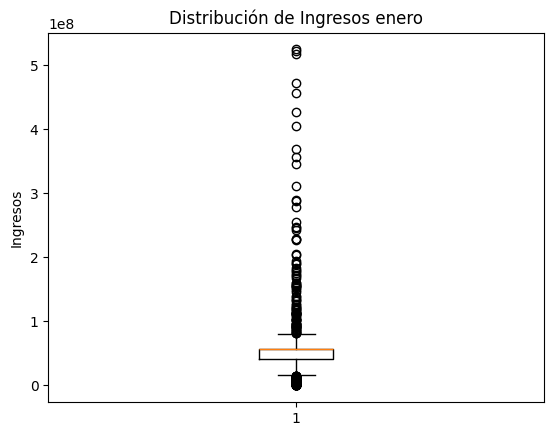

In [120]:
# Caja y bigotes por mes
month_data = data[data['releaseMonth'] == 1]

plt.boxplot(month_data["revenue"])

# Configuración adicional para mejorar la presentación
plt.title('Distribución de Ingresos enero')
plt.ylabel('Ingresos')

# Mostrar el gráfico
plt.show()

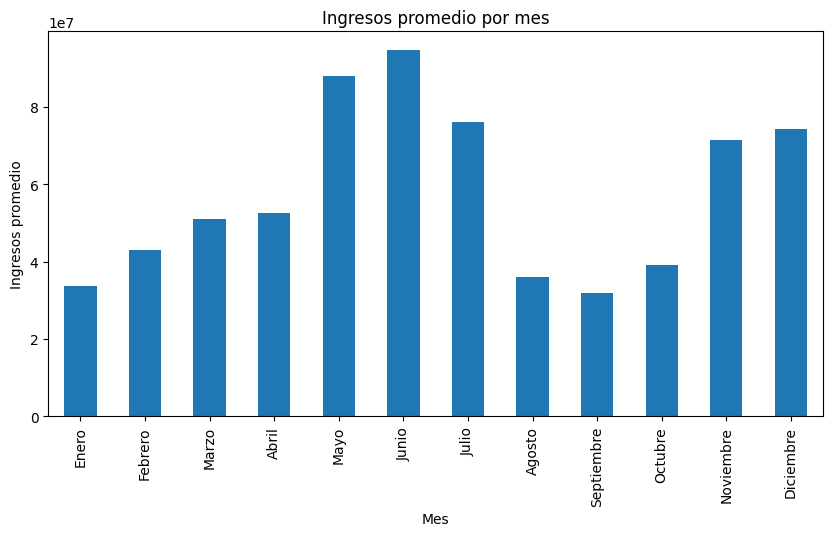

In [6]:
#ingresos por mes

# Asegurarse de que 'releaseDate' esté en formato de fecha
data['releaseDate'] = pd.to_datetime(data['releaseDate'], errors='coerce')

# Extraer el mes de la fecha de lanzamiento
data['month'] = data['releaseDate'].dt.month

# Calcular ingresos promedio por mes
average_revenue_per_month = data.groupby('month')['revenue'].mean()

month_names = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
    7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}


average_revenue_per_month.index = average_revenue_per_month.index.map(month_names)

# Gráfico de ingresos promedio por mes
plt.figure(figsize=(10, 5))
average_revenue_per_month.plot(kind='bar')
plt.title('Ingresos promedio por mes')
plt.xlabel('Mes')
plt.ylabel('Ingresos promedio')
plt.show()

# 4.13

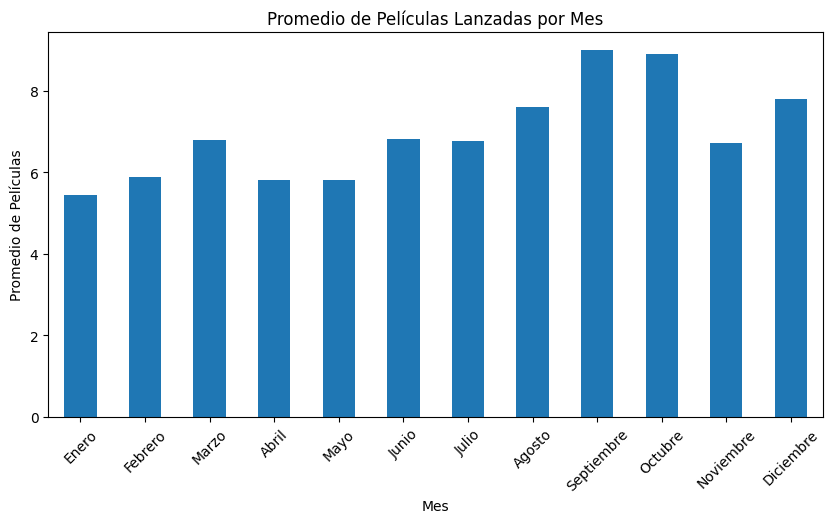

,Promedio lanzamientos
month,
Enero,5.433333
Febrero,5.883333
Marzo,6.791667
Abril,5.800000
Mayo,5.816667
Junio,6.825000
Julio,6.766667
Agosto,7.608333
Septiembre,8.991667


In [7]:

# --- Pregunta 1: ¿En qué meses se han visto los lanzamientos con mejores ingresos?

# Asegurarse de que 'releaseDate' esté en formato de fecha
data['releaseDate'] = pd.to_datetime(data['releaseDate'], errors='coerce')

# Extraer el mes de la fecha de lanzamiento
data['month'] = data['releaseDate'].dt.month

month_names = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
    7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}

lanzamientos_ingresos = data[['title', 'revenue', 'month']].sort_values(by='revenue', ascending=False)
lanzamientos_ingresos['month'] = lanzamientos_ingresos['month'].map(month_names)
lanzamientos_ingresos.head(10)

# -- Pregunta 2: ¿Cuántas películas, en promedio, se han lanzado por mes?


lanzamientos_mensuales_cuenta =  data.groupby('month')['id'].count()
lanzamientos_mensuales_promedio = lanzamientos_mensuales_cuenta / (data['releaseDate'].dt.year.max() - data['releaseDate'].dt.year.min())
lanzamientos_mensuales_promedio.index = lanzamientos_mensuales_promedio.index.map(month_names)


# Graficar promedio de lanzamientos al mes
plt.figure(figsize=(10, 5))
lanzamientos_mensuales_promedio.plot(kind='bar')
plt.title('Promedio de Películas Lanzadas por Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de Películas')
plt.xticks(rotation=45)
plt.show()

lanzamientos_mensuales_promedio.to_frame(name='Promedio lanzamientos')

# 4.14 ¿Cómo se correlacionan las calificaciones con el éxito comercial?

In [121]:
#limpiar datos de ingresos
data["revenue"].replace(0, data["revenue"].mean(), inplace=True)
data["voteAvg"].replace(np.nan, data["voteAvg"].mean(), inplace=True)

C:\Users\diego\AppData\Local\Temp\ipykernel_9284\838748948.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["revenue"].replace(0, data["revenue"].mean(), inplace=True)
C:\Users\diego\AppData\Local\Temp\ipykernel_9284\838748948.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [122]:
x = data["voteAvg"].values.reshape(-1, 1)
y = data["revenue"].values.reshape(-1, 1)

In [123]:
# Entrenar el modelo de regresion simple
regresor = LinearRegression()
regresor.fit(x, y)

LinearRegression()

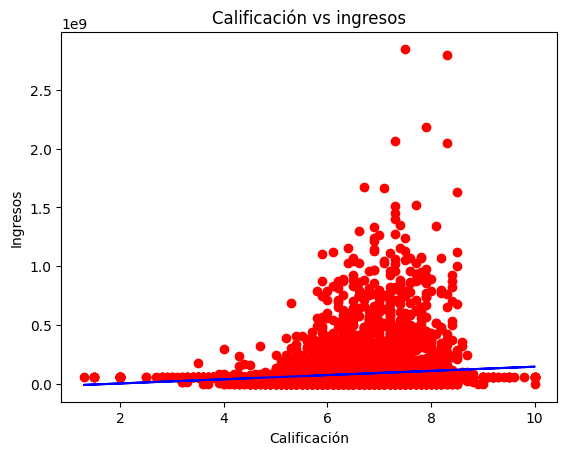

In [124]:
# Realizar gráfico
plt.scatter(x, y, color = 'red')
plt.plot(x, regresor.predict(x), color = 'blue')
plt.title('Calificación vs ingresos')
plt.xlabel('Calificación')
plt.ylabel('Ingresos')
plt.show()

In [125]:
# Calcular r2 del modelo
regresor.score(x, y)

0.015292357218266495

# 4.15

In [8]:
# 4.15
# Extraer género principal
data['main_genre'] = data['genres'].apply(lambda x: x.split('|')[0] if pd.notna(x) else x)

# Convertir 'runtime' a números, tratando los valores no numéricos como NaN
data['runtime'] = pd.to_numeric(data['runtime'], errors='coerce')

# Agrupar por género principal y calcular el promedio de duración
duracion_promedio_por_genero = data.groupby('main_genre')['runtime'].mean()

sorted_runtime = duracion_promedio_por_genero.sort_values(ascending=False)
sorted_runtime.to_frame(name='Duración promedio').head(1)

,Duración promedio
main_genre,
History,122.714286


# Preguntas extra

# 5.1 ¿Existe una correlación entre la duración de una película y su índice de popularidad?

In [126]:
filtered_data = data[data["popularity"].notna()]

x = filtered_data["runtime"].values.reshape(-1, 1)
y = filtered_data["popularity"].values.reshape(-1, 1)

In [127]:
# Entrenar el modelo de regresion simple
regresor = LinearRegression()
regresor.fit(x, y)

LinearRegression()

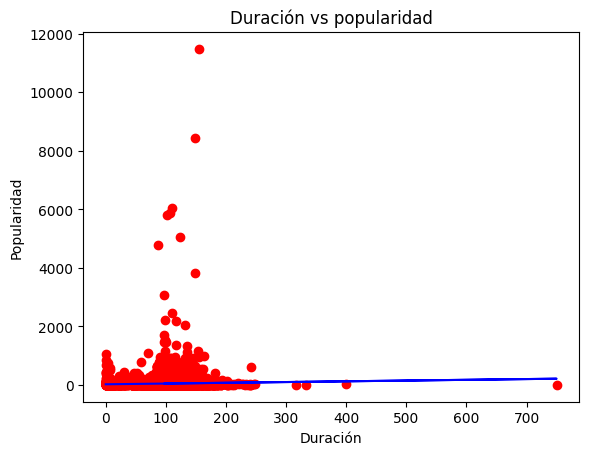

In [128]:
# Realizar gráfico
plt.scatter(x, y, color = 'red')
plt.plot(x, regresor.predict(x), color = 'blue')
plt.title('Duración vs popularidad')
plt.xlabel('Duración')
plt.ylabel('Popularidad')
plt.show()

In [129]:
# Calcular r2 del modelo
regresor.score(x, y)

0.0010626039698623524

# 5.2 ¿Cuál es el idioma de las 10 películas más taquilleras?

In [130]:
data.sort_values(by="revenue", ascending=False).head(10)[["originalLanguage", "revenue"]]

,originalLanguage,revenue
3211,en,2.847246e+09
5953,en,2.797801e+09
307,en,2.187464e+09
4948,en,2.068224e+09
5954,en,2.046240e+09
4915,en,1.671713e+09
7135,en,1.667635e+09
9050,en,1.631853e+09
3398,en,1.518816e+09
5088,en,1.515048e+09


# 5.3 ¿En promedio, cuáles son los 5 idiomas de origen que más recaudan?

In [131]:
data.groupby('originalLanguage')['revenue'].mean().reset_index().sort_values(by="revenue", ascending=False).head(5)

,originalLanguage,revenue
34,te,1.073783e+08
39,zh,1.063299e+08
8,en,9.296885e+07
0,ar,6.497893e+07
15,hi,5.805459e+07


# 5.4 ¿Cuál es la película de mayor duración?

In [132]:
data.sort_values(by="runtime", ascending=False)[["title", "runtime"]].head(1)

,title,runtime
9348,How Ponyo was Born ~Hayao Miyazaki's Thought Process~,750


# 5.5  ¿Cuáles son las productoras que, en promedio, invierten más en sus películas?

In [3]:
# filtrar datos faltantes de compañía y budget
filtered_data = data[data["productionCompany"].notna()]
filtered_data = filtered_data[filtered_data["budget"].notna()]

In [4]:
#Convertir budget a numérico
filtered_data["budget"] = pd.to_numeric(filtered_data["budget"], errors="coerce")

#Completar datos faltantes con la media
filtered_data["budget"].replace(0, filtered_data["budget"].mean(), inplace=True)

C:\Users\diego\AppData\Local\Temp\ipykernel_7200\1396660812.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_data["budget"].replace(0, filtered_data["budget"].mean(), inplace=True)


In [5]:
filtered_data.groupby('productionCompany')['budget'].mean().reset_index().sort_values(by="budget", ascending=False).head(5)

,productionCompany,budget
7686,Walt Disney Pictures|Jerry Bruckheimer Films|M...,380000000.0
1748,DC Comics|DC Entertainment|RatPac Entertainmen...,300000000.0
3454,Jerry Bruckheimer Films|Second Mate Production...,300000000.0
1755,DC Comics|Legendary Pictures|Bad Hat Harry Pro...,270000000.0
7672,Walt Disney Pictures|Fairview Entertainment,260000000.0


# 5.6 ¿Cuáles son los directores que han producido las películas más taquilleras?

In [9]:
# 5.6 ¿Cuáles son los directores que han producido las películas más taquilleras?

ingresos_promedio_por_director = data.groupby('director')['revenue'].mean()

# Mostrar los resultados
ingresos_promedio_directores = ingresos_promedio_por_director.sort_values(ascending=False)
ingresos_promedio_directores.to_frame(name='Ingresos promedio por película').head(10)

,Ingresos promedio por película
director,
Anthony Russo|Joe Russo,1.140422e+09
Kyle Balda|Pierre Coffin,1.094142e+09
Byron Howard|Rich Moore,1.023784e+09
Joss Whedon,9.876962e+08
Lee Unkrich,9.337479e+08
Andrew Adamson|Kelly Asbury|Conrad Vernon,9.287608e+08
Jon Watts,9.120825e+08
Chris Buck|Jennifer Lee,9.080820e+08
James Cameron,8.978972e+08
